# Agro-Informatics Project

### Instructor: 
Dr. Nimrod Schwartz
                

#### Abstract:
The retention curve of the soil describes the relationship between the water content and the matric potential in a state of equilibrium. The retention curve is of great importance in describing the hydraulic properties of the soil and is required for the purpose of modeling flow and convection processes, for the benefit of irrigation management and many other applications related to the management or evaluation of soil water. Also, the water flow in unsaturated flow as described by Buckingham Darcy, obtained by doubling the driving force in the conductivity of the medium.

In our experiment we performed pressure measurements by two tensiometers placed at different heights in a saturated soil column, which undergoes unsaturated flow evaporation. With the help of these data, it is possible to construct a retention curve, which connects between the changing water content and the matric potential of the soil. Also, with Buckingham Darcy equation it's possible to link between hydraulic conductivity and the matric potential.

#### Devices and procedure:
required equipment:
•	1 X ESP32

•	1 X Breadboard

•	2 X MPX5100DP - Pressure sensor

•	1X ADS1115- 16bit ADC (for analog reads)

•	1X Load cell with xfw-hx711- Measures weight

•	2X Tensiometer

•	4X Resistor 100K

#### Procedure:


<a href="https://ibb.co/LYTmjGP"><img src="https://i.ibb.co/RYXfr5S/map-connection.png" alt="map-connection" border="0"></a></a>



<a href="https://imgbb.com/"><img src="https://i.ibb.co/DLysg5F/conecting-pressure.png" alt="conecting-pressure" border="0"></a>


### Steps of action:
o	Two tensiometers should be quenched for at least 24 hours.

o	A small cylindrical column should be taken into which soil can be inserted.

o	The bottom of the column should be slightly perforated so that it can be saturated from below.

o	Also, the side of the cylinder must be perforated twice for the tensiometers.

o	Several equivalents must be made:

        Empty cylindrical column.
        
        A filled column with air-dried soil
        
        A filled column with soil after saturation
        
        Measurements over about ten days until the tensiometer ruptures.


### Methods:
Buckingham Darcy: $q=K(h)(dh/dz+1)$


$q=Q/A$

##### Q- rate of flow

##### K(h)- Hydraulic conductivity

##### h(m)- matric potential 

##### $\Delta z$ -The distance between two tensiometrs


It is important to note two important assumptions for the calculations in the experiment: the soil tested in our experiment is Hamra, whose hygroscopic water content is known to us from literary data (any soil can be taken anywhere). We also assumed that the change in the weight of the soil column constitutes the change in water content because of water evaporation.
To create a retention curve, first we calculated the oven dry soil by using the formula: 
$ Ws=Wa / 1+teta_r$

Second, we measured the weight of the empty column, the connected wires, and the oven-dry soil. We set a fixed number, the sum of all the weights above. We subtracted this number from the weight data, which left us with water weight only.
By dividing water weight with oven-dry soil weight, we got the water content. We converted the water content weight to volumetric water content by multiplying the water weight content with the bulk density of the soil. With the help of this data and the changing pressure data, we created a retention curve.

To create a graph linking the water content to the hydraulic conductivity, we used the Darcy Law, linking the flux to the hydraulic conductivity. The flux can be calculated at any given moment by the relationship between the flow rate and the cross-sectional area of the soil column. According to this, the hydraulic conductivity value can be isolated and calculated at any given time and thus tied to the water content that also changes over time. 


### Tips and Comments:
•	It is recommended that the test measurements be transmitted to the "Tingspeak" website and that a permanent and stable connection to a wireless network be ensured throughout the days of the test.

•	It is recommended to place the experiment on a stable surface, in an area with a standard and relatively constant temperature.

•	The tensiometers should be quenched for at least 24 hours by connecting its tip with a rubber roller to the syringe and creating a vacuum in a glass of water! Do not take it out of the water so as not to fill the clay pores with air.

•	Pay attention to the electrical connections, incorrect connection of one of the pins may burn the device and valuable work time will be wasted.


### Discussion 

While Data analysis, we encountered a problem. The weight data showed sharp and irregular increases. It is, of course, impossible as the water only evaporated from the complex, and nothing had been added to the complex. The option that the increase was caused by humidity was denied due to substantial weight changes. Also, we kept the conditions as regular as possible throughout the experiment. Thus, we concluded that there is a problem with the weighing device. Accordingly, we have tried to present the data in the best way. We chose to perform averages of 12 hours.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data= pd.read_csv ('data_for_agro_project.csv')
#print ('The dataset contains %i records of the weight and pressure.' %len(data))
data['dateTime']=pd.to_datetime(data['date and time'])
data=data.drop(columns=['date and time'])
data= data.set_index ('dateTime')
data['weight[g]']=pd.to_numeric(data['weight'],errors='coerce')
data['pressure0[cm]']=pd.to_numeric(data['pressure0'],errors='coerce')
data['pressure1[cm]']=pd.to_numeric(data['pressure1'],errors='coerce')


In [3]:
# clean the data
data = data.loc[data['weight[g]'] < 1000]  
data = data.loc[data['pressure0[cm]'] < 10] 
data = data.loc[data['pressure1[cm]'] < 10] 


data_regular=data.resample('12H').mean().interpolate('linear')



In [4]:
Wa=62 #gram, air dry soil
teta_r= 0.03 #[-], hygroscopic water contant
Ws=Wa/1+teta_r #gram, oven dry soil
V=7.06*np.pi*1.28**2 # [cm^3] volume of the column , radius=1.28cm
A=np.pi*1.28**2 #area of column
db= Ws/V
dw=1 #[g/cm^3] density of water 
Weight_column=58 # gram
fix_number= 291 # the weight of wires+tensiometrs+ws+empty column

In [5]:
# create new column
data_regular['water[g]'] = (data_regular['weight[g]'] -fix_number )
data_regular['water_contant[-]']=(data_regular['water[g]']/Ws)*db #Volumetric water content


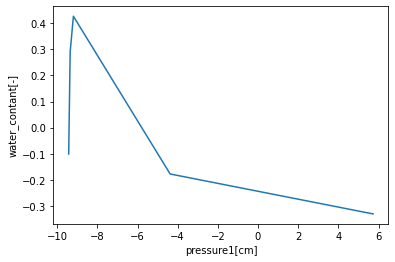

In [6]:
sns.lineplot(data=data_regular, x = 'pressure1[cm]', y = 'water_contant[-]')
plt.show()

In [7]:
data_regular['Vw[cm^3]'] = data_regular['water[g]'] / dw  #  volume of water
data_regular['Q[cm^3/h]'] = data_regular['Vw[cm^3]'] / 12 # divided by 12 because every 12 hours we did resample and mean 
data_regular['q[cm/h]'] = data_regular['Q[cm^3/h]'] / A #Flux of water
data_regular['dh[cm]'] = (data_regular['pressure0[cm]'] - data_regular['pressure1[cm]'])
dz =2.09 #[cm]
data_regular['k(h)[cm/h]'] = data_regular['q[cm/h]'] / ((data_regular['dh[cm]'] / dz) + 1) # Buckingham Darcy law


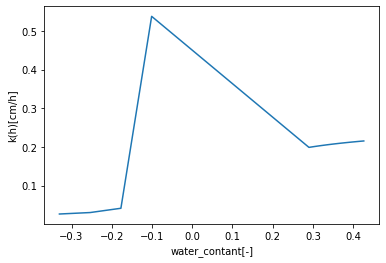

In [8]:
sns.lineplot(data=data_regular, x = 'water_contant[-]', y = 'k(h)[cm/h]')
plt.show()